# Deep learning
# 1. A single neuron

### Линейная единица
Итак, давайте начнем с фундаментального компонента нейронной сети - отдельного нейрона. На диаграмме нейрон (или единица) с одним входом выглядит следующим образом:

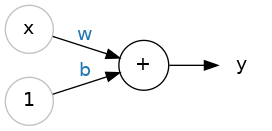

Входной сигнал равен **x**. Его соединение с нейроном имеет вес, равный w. Всякий раз, когда значение передается по соединению, вы умножаете это значение на вес соединения. Для входного сигнала x значение, достигающее нейрона, равно **w * x**. Нейронная сеть "учится", изменяя свои веса.

b - это особый вид веса, который мы называем смещением. Смещение не связано с какими-либо входными данными; вместо этого мы ставим на диаграмме 1, чтобы значение, которое достигает нейрона, было просто **b** (поскольку **1 * b = b**). Смещение позволяет нейрону изменять выходные данные независимо от его входных данных.

**Y** - это значение, которое в конечном итоге выдает нейрон. Чтобы получить выходные данные, нейрон суммирует все значения, которые он получает через свои соединения. Активация этого нейрона заключается в **y = w * x + b**, или в виде формулы **y = wx + b**.

### Пример - Линейная единица в качестве модели
Хотя отдельные нейроны обычно функционируют только как часть более крупной сети, часто бывает полезно начать с модели одного нейрона в качестве базовой. Модели с одним нейроном являются линейными моделями.

Давайте подумаем о том, как это могло бы работать с таким набором данных, как 80 зерновых культур. Обучая модель, используя **"sugars"** (граммы сахара на порцию) в качестве входных данных и **"calories"** (калории на порцию) в качестве выходных данных, мы могли бы обнаружить, что отклонение составляет **b = 90**, а вес - **w = 2,5**. Мы могли бы оценить калорийность хлопьев с 5 граммами сахара на порцию. подавать вот так:

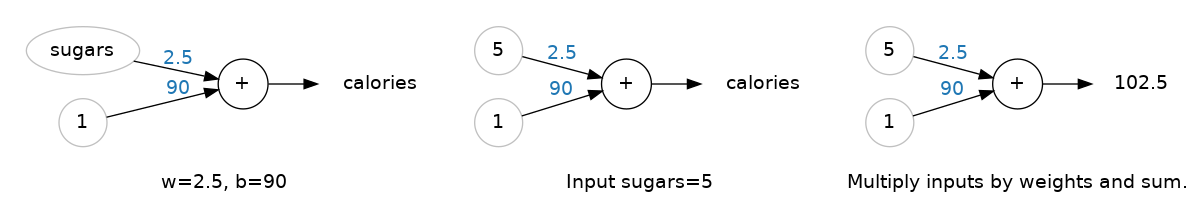

И, сверяясь с нашей формулой, мы получаем ***calories = 2.5 * 5 + 90 = 102.5***,  именно так, как мы и ожидали.

### Множество входных данных
Набор данных о 80 злаках содержит гораздо больше функций, чем просто **"sugars"**. Что, если бы мы захотели расширить нашу модель, включив в нее такие параметры, как содержание клетчатки или белка? Это достаточно просто. Мы можем просто добавить к нейрону больше входных соединений, по одному для каждой дополнительной функции. Чтобы найти выходные данные, мы бы умножили каждый входной сигнал на его вес соединения, а затем сложили бы их все вместе.

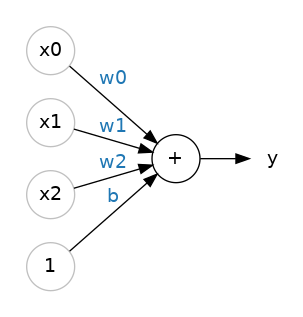

Формула для этого нейрона была бы следующей \( y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b \). 
Линейный блок с двумя входами будет соответствовать плоскости, а блок с большим количеством входов, чем это, будет соответствовать гиперплоскости.

### Линейные единицы измерения в Keras
Самый простой способ создать модель в Keras - это использовать **keras.Sequential**, который создает нейронную сеть в виде набора слоев. Мы можем создавать модели, подобные описанным выше, используя плотный слой (о котором мы узнаем больше в следующем уроке).

Мы могли бы определить линейную модель, принимающую три входных параметра (**"sugars"**, **"fiber"** и **"protein"**) и выдающую один выходной параметр (**"calories"**) следующим образом:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Создайте сеть с 1 линейной единицей измерения
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

С первым аргументом, **units**, мы определяем, сколько выходных данных нам нужно.В данном случае мы просто предсказываем **'calories'**, итак, мы будем использовать **units=1**.

Со вторым аргументом, **input_shape**, мы сообщаем Keras размеры входных данных. Установка **input_shape=[3]** гарантирует, что модель будет принимать три функции в качестве входных данных (**'sugars'**, **'fiber'**, and **'protein'**).

Теперь эта модель готова к адаптации к тренировочным данным!

Веса модели хранятся в ее атрибуте weights в виде списка тензоров. Получите веса модели, которую вы определили выше

In [ ]:
w, b = model.weights

# Deep Neural Networks
### Вступление
На этом уроке мы увидим, как можно построить нейронную сеть, способную изучать сложные взаимосвязи, которыми славятся глубокие нейронные сети.

Ключевая идея здесь - модульность, построение сложной сети из более простых функциональных блоков. Мы уже видели, как линейные блоки вычисляют линейную функцию - теперь мы увидим, как комбинировать и модифицировать отдельные тематические блоки для моделирования более сложных взаимосвязей.
### Слои
Нейронные сети обычно организуют свои нейроны в слои. Когда мы собираем вместе линейные блоки, имеющие общий набор входных данных, мы получаем плотный слой.\
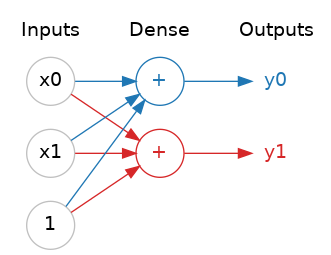

Можно представить, что каждый слой нейронной сети выполняет какое-то относительно простое преобразование. Используя большое количество слоев, нейронная сеть может преобразовывать свои входные данные все более сложными способами. В хорошо обученной нейронной сети каждый уровень представляет собой трансформацию, которая немного приближает нас к решению.
### Функция активации(The Activation Function)
Однако оказывается, что два плотных слоя, между которыми ничего нет, ничем не лучше, чем один плотный слой сам по себе. Плотные слои сами по себе никогда не смогут вывести нас из мира линий и плоскостей. Нам нужно что-то нелинейное. Что нам нужно, так это функции активации.\
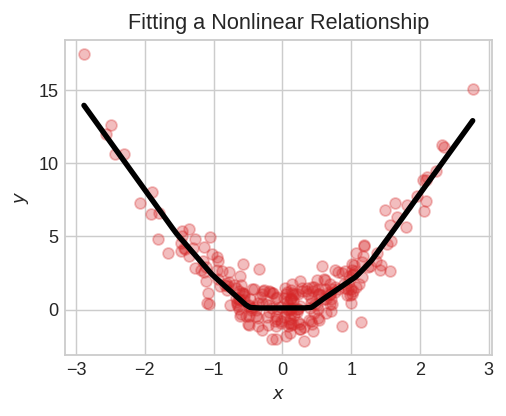

*Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.*\
\
Функция активации - это просто некоторая функция, которую мы применяем к каждому из выходов уровня (его активациям). Наиболее распространенной является функция выпрямителя ***max(0,x)***.\
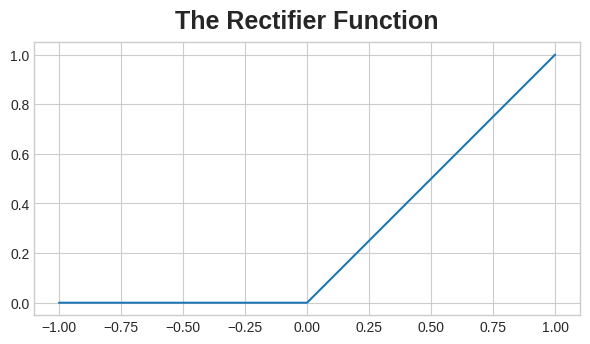

Функция rectifier представляет собой график в виде линии с отрицательной частью, "выпрямленной" до нуля. Применение функции к выходным данным нейрона приведет к искажению данных, что позволит нам отойти от простых линий.

Когда мы подключаем выпрямитель к линейному блоку, мы получаем выпрямленный линейный блок или ReLU. (По этой причине функцию выпрямителя принято называть "функцией ReLU".) Применение активации ReLU к линейному блоку означает, что выходной сигнал становится ***max(0, w * x + b)***, который мы могли бы изобразить на диаграмме, подобной:\
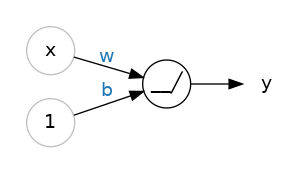

*A rectified linear unit*
### Укладка плотных слоев
Теперь, когда у нас есть некоторая нелинейность, давайте посмотрим, как мы можем укладывать слои для получения сложных преобразований данных.\
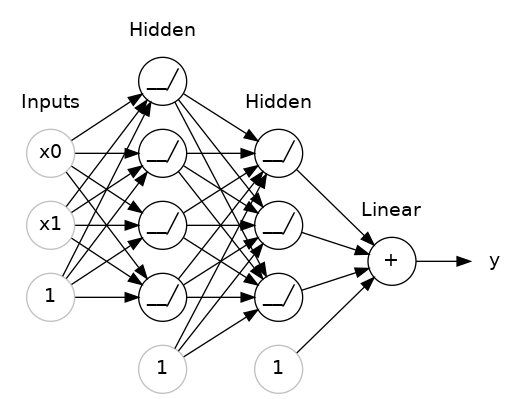

*A stack of dense layers makes a "fully-connected" network.*


Слои, расположенные перед выходным слоем, иногда называют скрытыми, поскольку мы никогда не видим их выходные данные напрямую.

Теперь обратите внимание, что последний (выходной) слой представляет собой линейную единицу (что означает отсутствие функции активации). Это делает эту сеть подходящей для задачи регрессии, в которой мы пытаемся предсказать некоторое произвольное числовое значение. Для других задач (например, для классификации) может потребоваться функция активации на выходе.

### Построение последовательных моделей
Последовательная (***Sequential***) модель, которую мы использовали, соединит вместе список слоев в порядке от первого к последнему: первый слой получает входные данные, последний слой выдает выходные данные. Таким образом, будет создана модель, показанная на рисунке выше:

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers

model = keras.Sequential([
    # скрытые слои ReLU
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # уровень линейного вывода 
    layers.Dense(units=1),
])

Обязательно соберите все слои вместе в виде списка, например [layer, layer, layer, ...] вместо отдельных аргументов. Чтобы добавить функцию активации к слою, просто укажите ее название в поле **activation** argument.

# Stochastic Gradient Descent (Стохастический градиентный спуск)
### вступление
На первых двух уроках мы узнали, как создавать полностью подключенные сети из множества плотных слоев. При первом создании все веса сети задаются случайным образом - сеть еще ничего не "знает". На этом уроке мы рассмотрим, как обучать нейронную сеть; мы увидим, как нейронные сети обучаются.

Как и во всех задачах машинного обучения, мы начинаем с набора обучающих данных. Каждый пример в обучающих данных состоит из некоторых характеристик (входных данных) вместе с ожидаемой целью (выходными данными). Обучение сети означает настройку ее весовых коэффициентов таким образом, чтобы она могла преобразовать объекты в целевые. Например, в наборе данных 80 зерновых культур нам нужна сеть, которая может принимать все зерновые культуры **'sugar'**, **'fiber'**, и **'protein'** содержите и прогнозируйте **'calories'** этих злаков. Если мы сможем успешно обучить сеть этому, ее веса должны каким-то образом отражать взаимосвязь между этими функциями и целью, как это выражено в обучающих данных.

В дополнение к обучающим данным нам нужны еще две вещи:

"Функция потерь" (loss function), которая измеряет, насколько точны прогнозы сети.
"Оптимизатор", который может указывать сети, как изменять свои веса.

### The Loss Function
Мы видели, как проектировать архитектуру сети, но мы не видели, как указать сети, какую проблему нужно решить. Это задача функции потерь.

Функция потерь измеряет несоответствие между истинным значением цели и значением, прогнозируемым моделью.

Для разных задач требуются разные функции потерь. Мы рассматривали задачи регрессии, в которых задача состоит в том, чтобы предсказать некоторое числовое значение - количество калорий в 80 злаках, оценку качества красного вина. Другими задачами регрессии могут быть прогнозирование стоимости дома или топливной экономичности автомобиля.

Обычной функцией потерь для задач регрессии является средняя абсолютная ошибка или MAE. Для каждого прогноза **y_pred**, MAE измеряет несоответствие с истинной целью **y_true** на абсолютную разницу **abs(y_true - y_pred)**.
Общая потеря MAE в наборе данных является средним значением всех этих абсолютных различий.\

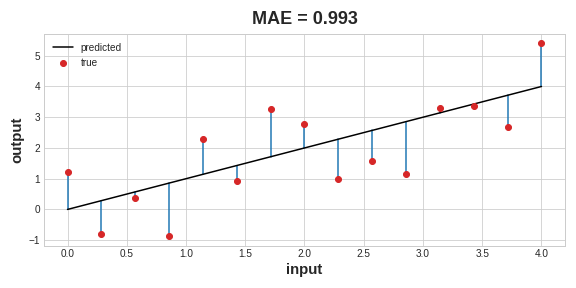

*The mean absolute error is the average length between the fitted curve and the data points.*\
\
Помимо MAE, другие функции потерь, которые вы можете увидеть при решении задач регрессии, - это среднеквадратичная ошибка (MSE) или потери по Хуберу (обе доступны в Keras).

Во время обучения модель будет использовать функцию потерь в качестве ориентира для определения правильных значений своих весов (чем меньше потери, тем лучше). Другими словами, функция потерь сообщает сети ее цель.

### Оптимизатор - Стохастический градиентный спуск
Мы описали проблему, которую хотим решить с помощью сети, но теперь нам нужно сказать, как ее решить. Это работа оптимизатора. Оптимизатор - это алгоритм, который корректирует веса, чтобы минимизировать потери.

Практически все алгоритмы оптимизации, используемые в глубоком обучении, относятся к семейству, называемому стохастическим градиентным спуском. Это итеративные алгоритмы, которые обучают сеть поэтапно. Один из этапов обучения выглядит следующим образом:

1. Выборка некоторых обучающих данных и прогон их через сеть для составления прогнозов.
2. Измерьте разницу между прогнозируемыми и истинными значениями потерь.
3. Наконец, отрегулируйте веса в направлении уменьшения потерь.
Затем просто повторяйте это снова и снова, пока потери не станут настолько малы, насколько вам хочется (или пока они не перестанут уменьшаться).

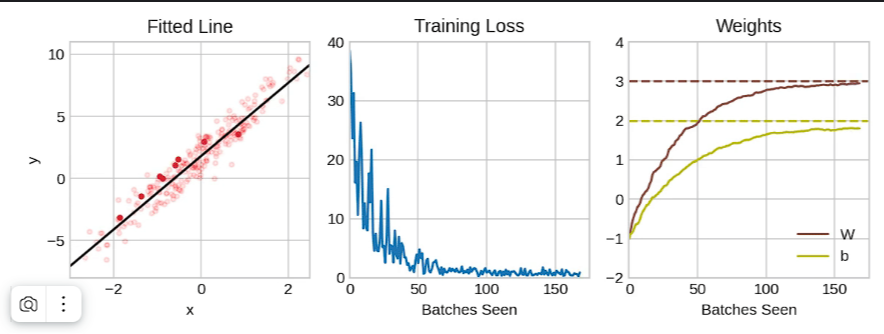

*Training a neural network with Stochastic Gradient Descent*

Выборка обучающих данных для каждой итерации называется мини-пакетом (или часто просто "пакетом"), в то время как полный цикл обучающих данных называется эпохой. Количество периодов, в течение которых вы тренируетесь, - это то, сколько раз сеть увидит каждый обучающий пример.

На анимации показана линейная модель из урока 1, обучаемая с помощью SGD. Бледно-красные точки отображают весь обучающий набор, а сплошные красные точки - это мини-наборы. Каждый раз, когда SGD видит новую мини-партию, она смещает веса (**w** - угол наклона и **b** - угол пересечения по оси y) в сторону их правильных значений для этой партии. Партия за партией, линия в конечном итоге приближается к оптимальному размеру. Вы можете видеть, что потери уменьшаются по мере приближения весов к их истинным значениям.

### Learning Rate and Batch Size
Обратите внимание, что линия совершает лишь небольшой сдвиг в направлении каждого пакета (вместо того, чтобы двигаться полностью). Величина этих сдвигов определяется **скоростью обучения** (learning rate). Меньшая скорость обучения означает, что сети необходимо просмотреть больше мини-пакетов, прежде чем ее весовые коэффициенты достигнут оптимальных значений.

Скорость обучения и размер мини-пакетов - это два параметра, которые оказывают наибольшее влияние на то, как проходит обучение SGD. Их взаимодействие часто неуловимо, и правильный выбор этих параметров не всегда очевиден. (Мы рассмотрим эти эффекты в упражнении).

К счастью, для большинства задач нет необходимости выполнять обширный поиск по гиперпараметрам, чтобы получить удовлетворительные результаты. **Adam** - это алгоритм SGD, который обладает адаптивной скоростью обучения, что делает его пригодным для решения большинства задач без какой-либо настройки параметров (в некотором смысле, это "самонастраивающийся" алгоритм). Адам - отличный оптимизатор общего назначения.

### Добавление потерь и оптимизатора
После определения модели вы можете добавить функцию потерь и оптимизатор с помощью метода компиляции модели:
```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Обратите внимание, что мы можем указать потери и оптимизатор с помощью простой строки. Вы также можете получить к ним доступ напрямую через Keras API, например, если хотите настроить параметры, но для нас значения по умолчанию будут работать нормально.

### Пример - Качество красного вина
Теперь мы знаем все, что нам нужно для начала обучения моделей глубокого обучения. Итак, давайте посмотрим на это в действии! Мы будем использовать набор данных о качестве красного вина.

Этот набор данных состоит из физико-химических измерений примерно 1600 португальских красных вин. Также прилагается оценка качества каждого вина по результатам слепых дегустационных тестов. Насколько точно мы можем предсказать восприятие качества вина на основе этих измерений?

Мы поместили всю подготовку данных в следующую скрытую ячейку. Это не обязательно для того, что следует за этим, поэтому не стесняйтесь пропустить это. Однако, на данный момент вы можете обратить внимание на то, что мы изменили масштаб каждой функции, чтобы она находилась в интервале [0, 1]. Как мы подробнее обсудим в уроке 5, нейронные сети, как правило, работают лучше всего, когда их входные данные находятся в общем масштабе.


In [2]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Сколько входов должно быть в этой сети? Мы можем определить это, посмотрев на количество столбцов в матрице данных. Убедитесь, что в нее не включен целевой объект  ('quality') здесь - только входные данные.

In [3]:
print(X_train.shape)

(1119, 11)


Одиннадцать столбцов означают одиннадцать входных данных.

Мы выбрали трехуровневую сеть с более чем 1500 нейронами. Эта сеть должна быть способна изучать довольно сложные взаимосвязи в данных.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Выбор архитектуры вашей модели должен быть частью процесса. Начните с простого и используйте потери при проверке в качестве ориентира.

После определения модели мы проводим компиляцию с помощью оптимизатора и функции потерь.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Теперь мы готовы начать обучение! Мы попросили Keras загружать в оптимизатор 256 строк обучающих данных за раз (the batch_size) и проделать это 10 раз на протяжении всего набора данных (the epochs).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

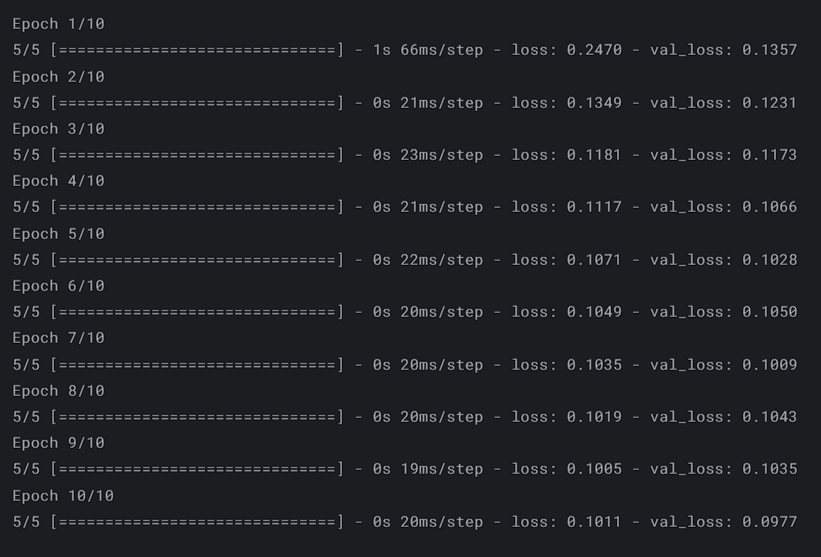

Вы можете видеть, что Кира будет информировать вас о потерях по мере отработки модели.

Однако зачастую лучший способ увидеть потерю - это построить график. То **fit** метод фактически ведет учет потерь, произведенных во время тренировки в **History** объект. Мы преобразуем данные в Pandas dataframe, что упрощает построение графика.

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

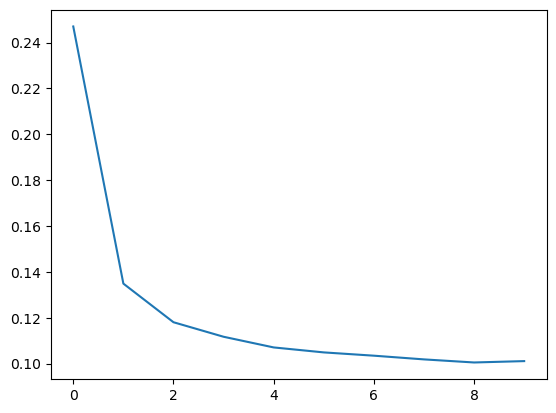

Обратите внимание, как с течением времени потери снижаются. Когда кривая потерь становится горизонтальной, это означает, что модель изучила все, что могла, и нет смысла продолжать использовать дополнительные периоды.

# Overfitting and Underfitting
### Вступление
Напомним из примера, приведенного в предыдущем уроке, что Keras будет вести журнал потерь при обучении и валидации в течение периодов, в течение которых выполняется обучение модели. На этом уроке мы узнаем, как интерпретировать эти кривые обучения и как мы можем использовать их для руководства разработкой модели. В частности, мы рассмотрим кривые обучения на предмет наличия признаков недостаточной или чрезмерной подготовки и рассмотрим пару стратегий для ее исправления.
### Интерпретация кривых обучения¶
Вы можете подумать, что информация, содержащаяся в данных обучения, бывает двух видов: сигнал и шум. Сигнал - это та часть, которая обобщает, та часть, которая может помочь нашей модели делать прогнозы на основе новых данных. Шум - это та часть, которая относится только к обучающим данным; шум - это все случайные колебания, которые происходят из данных в реальном мире, или все случайные, неинформативные закономерности, которые на самом деле не могут помочь модели делать прогнозы. Шум - это та часть, которая может показаться полезной, но на самом деле таковой не является.

Мы обучаем модель, выбирая веса или параметры, которые минимизируют потери на обучающем наборе. Однако, возможно, вы знаете, что для точной оценки производительности модели нам необходимо оценить ее на новом наборе данных - данных проверки.
Когда мы обучаем модель, мы строим график потерь на обучающем наборе, эпоха за эпохой. К этому мы добавим график данных валидации. Эти графики мы называем **кривыми обучения**. Чтобы эффективно обучать моделям глубокого обучения, мы должны уметь их интерпретировать.

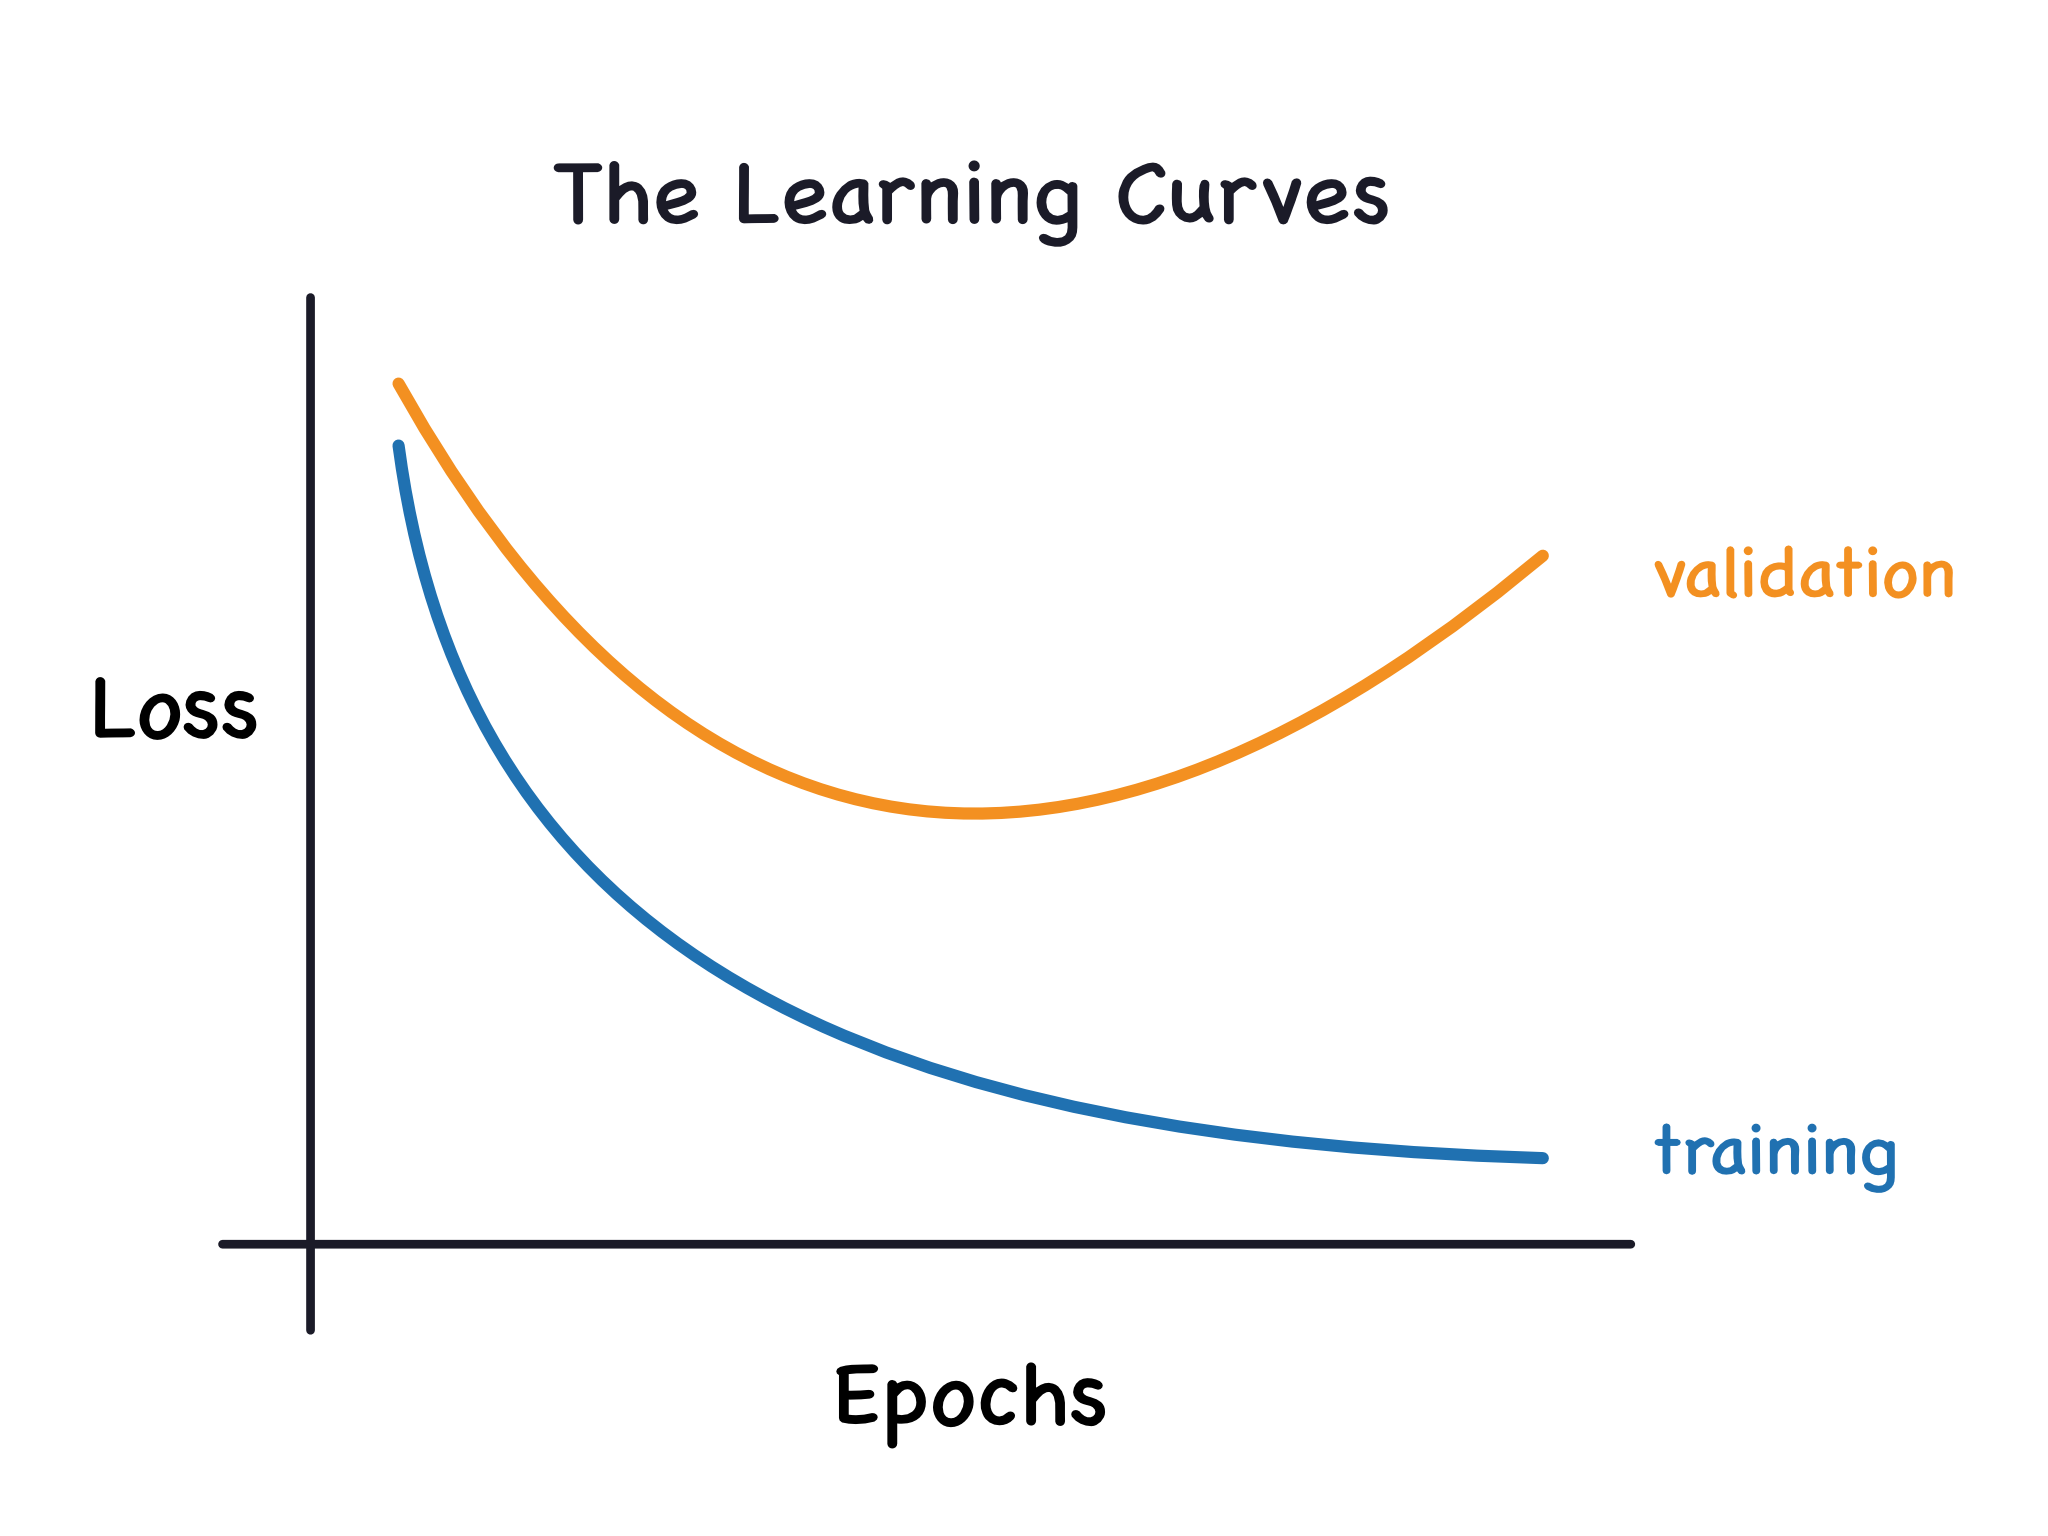

                                *Потеря проверки дает оценку ожидаемой ошибки в невидимых данных*

Теперь потери при обучении уменьшатся либо когда модель распознает сигнал, либо когда она распознает шум. Но потери при проверке уменьшатся только тогда, когда модель распознает сигнал. (Какой бы шум модель ни извлекла из обучающего набора, он не будет обобщен на новые данные.) Итак, когда модель распознает сигнал, обе кривые идут вниз, но когда она распознает шум, в кривых создается разрыв. Размер зазора говорит вам о том, сколько шума усвоила модель.

В идеале, мы бы создали модели, которые изучали бы все сигналы и не учитывали бы шумы. Но этого практически никогда не происходит. Вместо этого мы заключаем сделки. Мы можем заставить модель изучать больше сигналов за счет изучения большего количества шумов. До тех пор, пока сделка будет заключаться в нашу пользу, потери от проверки будут продолжать уменьшаться. Однако после определенного момента сделка может обернуться против нас, затраты превысят выгоду, и потери от проверки начнут расти.

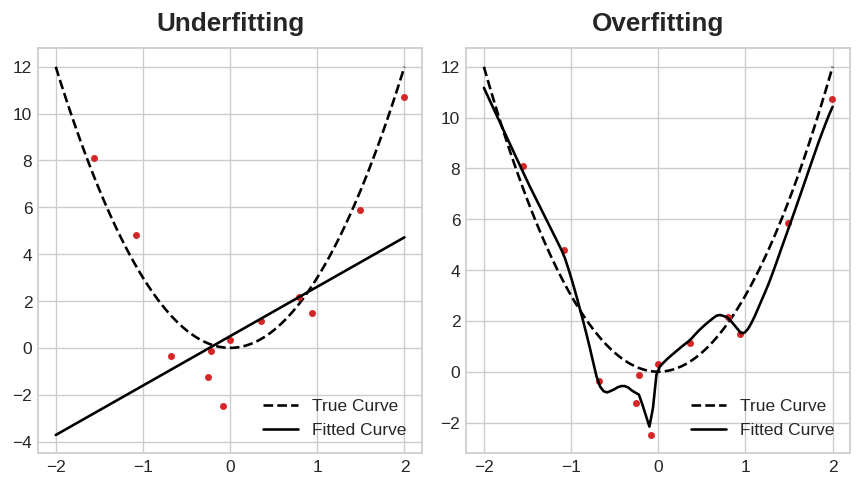

                                *Underfitting and overfitting*

Этот компромисс указывает на то, что при обучении модели могут возникнуть две проблемы: недостаточный сигнал или слишком много шума. *Недообучение* соответствие обучающего набора - это когда потери не так малы, как могли бы быть, потому что модель не усвоила достаточного количества сигналов. *Переобучение* обучающего набора - это когда потери не так малы, как могли бы быть, потому что модель усвоила слишком много шума. Хитрость в обучении моделей глубокого обучения заключается в нахождении наилучшего баланса между ними.

Мы рассмотрим несколько способов извлечь больше сигнала из обучающих данных при одновременном снижении количества шума.

### Вместимость (Capacity)
Производительность модели определяется размером и сложностью паттернов, которые она способна изучать. Что касается нейронных сетей, то это в значительной степени будет зависеть от того, сколько в них нейронов и как они связаны друг с другом. Если вам кажется, что ваша сеть недостаточно пропускает данные, попробуйте увеличить ее пропускную способность.

Вы можете увеличить пропускную способность сети, либо расширив ее (увеличив количество единиц на существующих уровнях), либо углубив ее (добавив больше слоев). Более широкие сети легче усваивают более линейные взаимосвязи, в то время как более глубокие сети предпочитают более нелинейные. Что лучше, зависит только от набора данных.

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

В ходе упражнения вы узнаете, как пропускная способность сети может повлиять на ее производительность.

### Преждевременная остановка
Мы упоминали, что, когда модель слишком усердно изучает шум, потери при проверке могут начать увеличиваться во время обучения. Чтобы предотвратить это, мы можем просто остановить обучение, когда кажется, что потери при проверке больше не уменьшаются. Прерывание обучения таким образом называется преждевременной остановкой.

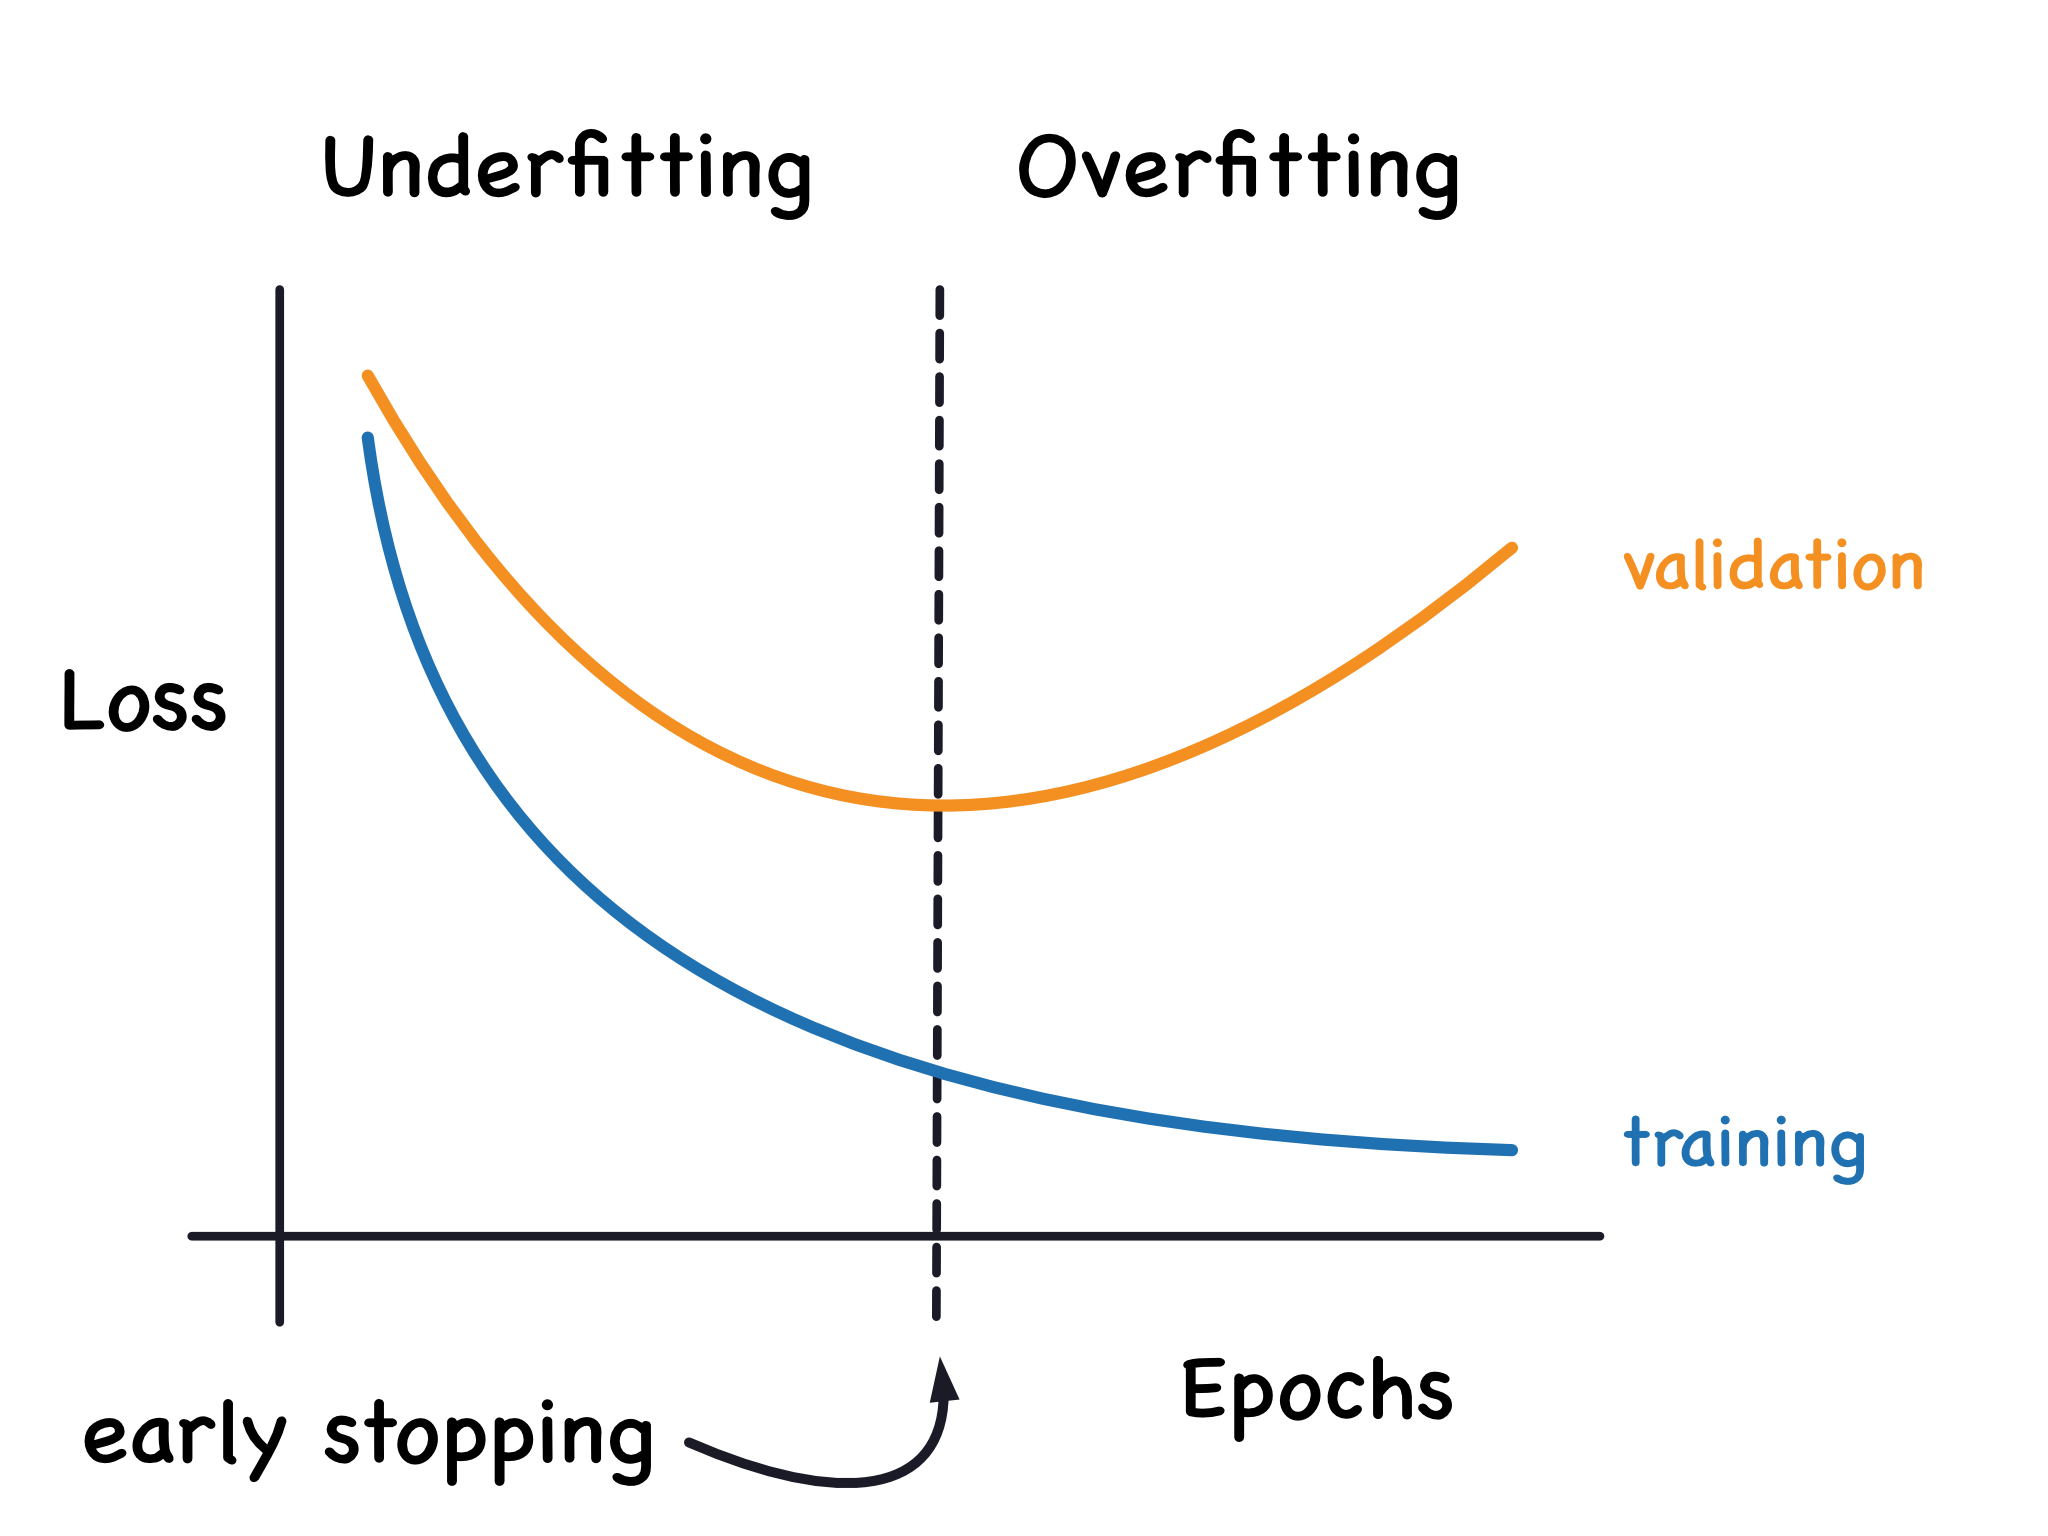

                                ***We keep the model where the validation loss is at a minimum.***
Как только мы обнаружим, что потери при проверке снова начинают увеличиваться, мы можем вернуть значения весов к тому уровню, при котором они были минимальными. Это гарантирует, что модель не будет продолжать накапливать шумы и перерабатывать данные.

Тренировка с ранней остановкой также означает, что мы в меньшей степени рискуем прервать тренировку слишком рано, до того, как сеть закончит передачу сигнала об обучении. Таким образом, помимо предотвращения переобучения из-за слишком долгой тренировки, ранняя остановка также может предотвратить недостаточную подготовку из-за недостаточного времени тренировки. Просто установите для своих тренировок несколько большее время (больше, чем вам нужно), и ранняя остановка позаботится обо всем остальном.

### Добавление ранней остановки
В компании Keras мы включаем раннюю остановку в наше обучение с помощью обратного вызова. Обратный вызов - это просто функция, которую вы хотите запускать время от времени, пока сеть тренируется. Обратный вызов для ранней остановки будет выполняться после каждой эпохи. (В Keras есть множество предопределенных полезных обратных вызовов, но вы также можете задать свои собственные.)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Эти параметры гласят: "Если за предыдущие 20 периодов потери при проверке не уменьшились хотя бы на 0,001, прекратите обучение и сохраните лучшую модель, которую вы нашли". Иногда бывает трудно определить, увеличиваются ли потери при проверке из-за переобучения или просто из-за случайного изменения партии. Параметры позволяют нам установить некоторые ограничения на время остановки.

Как мы увидим в нашем примере, мы передадим этот обратный вызов методу fit вместе с loss и оптимизатором.

### Пример - Обучаем модель с ранней остановкой
Давайте продолжим разработку модели на основе примера из предыдущего руководства. Мы увеличим пропускную способность этой сети, а также добавим функцию раннего завершения обратного вызова, чтобы предотвратить переобучение.

Снова приступаем к подготовке данных.

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

Теперь давайте увеличим пропускную способность сети. Мы используем довольно большую сеть, но полагаемся на обратный вызов, который остановит обучение, как только появятся признаки увеличения потерь при проверке.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # минимальное количество изменений, которые считаются улучшением
    patience=20, # сколько эпох нужно подождать, прежде чем остановиться
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

После определения обратного вызова добавьте его в качестве аргумента в **fit** (у вас может быть несколько вариантов, поэтому внесите их в список). При использовании ранней остановки выберите большое количество эпох, больше, чем вам нужно.

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

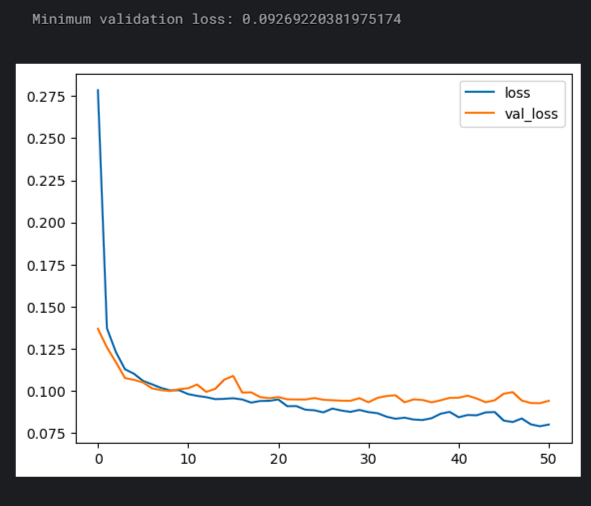

# Dropout and Batch Normalization (Отсев и нормализация пакетов)
### Dropout (Выпадение)
Первый из них - это "уровень отсева", который может помочь исправить переобучение.

На прошлом уроке мы говорили о том, как переобучение вызвано тем, что сеть изучает ложные шаблоны в обучающих данных. Чтобы распознать эти ложные шаблоны, сеть часто полагается на очень специфические комбинации весов, своего рода "заговор" весов. Будучи настолько специфичными, они, как правило, хрупки: уберите один из них, и заговор развалится.

В этом и заключается идея отсева. Чтобы разрушить эти заговоры, мы случайным образом отсеиваем некоторую часть входных единиц уровня на каждом этапе обучения, что значительно затрудняет для сети изучение этих ложных шаблонов в обучающих данных. Вместо этого он должен искать широкие, общие закономерности, весовые коэффициенты которых, как правило, более надежны.

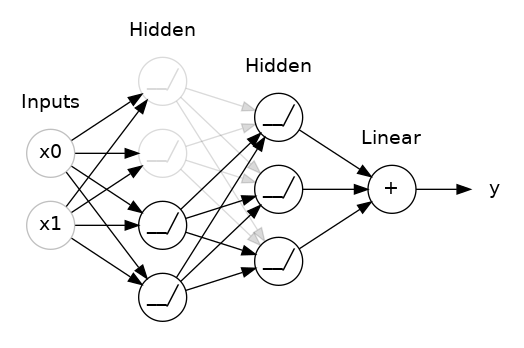

                    ***Here, 50% dropout has been added between the two hidden layers.***

Вы также можете рассматривать отсев как создание своего рода ансамбля сетей. Прогнозы больше не будут делаться одной большой сетью, а комитетом из более мелких сетей. Отдельные члены комитета, как правило, совершают различные ошибки, но в то же время оказываются правы, что делает комитет в целом лучше, чем любого отдельного сотрудника. (Если вы знакомы со случайными лесами как совокупностью деревьев решений, это та же идея.)

### Добавление отсева
В Keras параметр rate (коэффициент выпадения) определяет, какой процент входных блоков следует отключить. Поместите слой выпадения непосредственно перед слоем, к которому вы хотите применить выпадение:
```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

### Batch Normalization (Пакетная нормализация)
Следующий специальный уровень, который мы рассмотрим, выполняет "пакетную нормализацию" (или "batchnorm"), которая может помочь скорректировать медленное или нестабильное обучение.

В случае с нейронными сетями, как правило, рекомендуется привести все ваши данные к общему масштабу, возможно, с помощью чего-то вроде scikit-learn StandardScaler или MinMaxScaler. Причина в том, что SGD будет изменять вес сети пропорционально тому, насколько большую активацию производят данные. Функции, которые, как правило, приводят к активациям очень разного размера, могут привести к нестабильному поведению при обучении.

Теперь, если есть смысл нормализовать данные до того, как они отправятся в сеть, возможно, было бы лучше нормализовать и внутри сети! На самом деле, у нас есть специальный уровень, который может это сделать, - уровень пакетной нормализации. Слой нормализации пакетов просматривает каждый пакет по мере его поступления, сначала нормализуя пакет с помощью его собственного среднего значения и стандартного отклонения, а затем также помещая данные в новый масштаб с двумя настраиваемыми параметрами масштабирования. Batchnorm, по сути, выполняет своего рода скоординированное изменение масштаба своих входных данных.

Чаще всего batchnorm добавляется в качестве вспомогательного средства в процессе оптимизации (хотя иногда это также может повысить эффективность прогнозирования). Моделям с batchnorm, как правило, требуется меньше периодов для завершения обучения. Более того, batchnorm также может устранять различные проблемы, из-за которых обучение может "застревать". Рассмотрите возможность добавления пакетной нормализации в свои модели, особенно если у вас возникают проблемы во время обучения.

Добавление пакетной нормализации
Похоже, что пакетную нормализацию можно использовать практически в любой точке сети. Вы можете наносить его следующим слоем...
```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```
... или между слоем и его функцией активации:
```
layers.Dense(16),
layers.Batch Normalization(),
layers.Activation('relu'),
```

И если вы добавите его в качестве первого уровня своей сети, он может действовать как своего рода адаптивный препроцессор, заменяющий что-то вроде Sci-Kit Learn's StandardScaler.

### Пример - Использование отсева и нормализации партии
Давайте продолжим разработку модели Red Wine. Теперь мы еще больше увеличим производительность, но добавим отсев для контроля переоборудования и нормализацию партии для ускорения оптимизации. На этот раз мы также не будем стандартизировать данные, чтобы продемонстрировать, как пакетная нормализация может стабилизировать процесс обучения.

In [ ]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

На этот раз ничего не нужно менять в том, как мы организовали тренировку.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

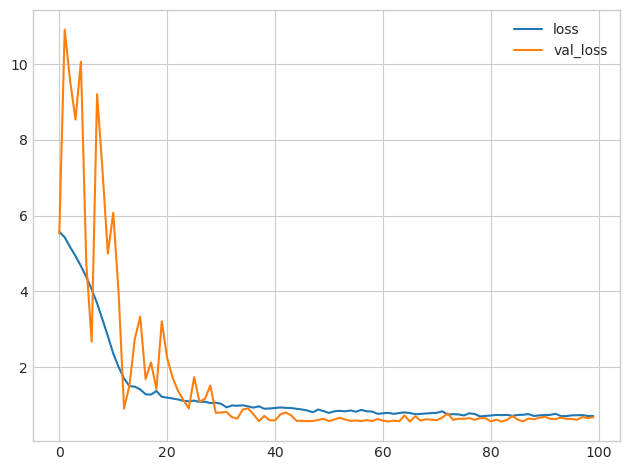